# Mathematical Transformations
- Log transformation
- Reciprocal
- Power(sq/srt)

## Data collection

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Datasets/Titanic-Dataset.csv',usecols = ['Survived','Fare','Age'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
df['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size = 0.2, random_state = 42)

In [10]:
X_train.sample(2)

,Age,Fare
391,21.0,7.7958
855,18.0,9.3500


In [11]:
y_train.sample(2)

797    1
36     1
Name: Survived, dtype: int64

In [12]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(712, 2) (712,) (179, 2) (179,)


## Checking if data is noramlly distributed or not

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

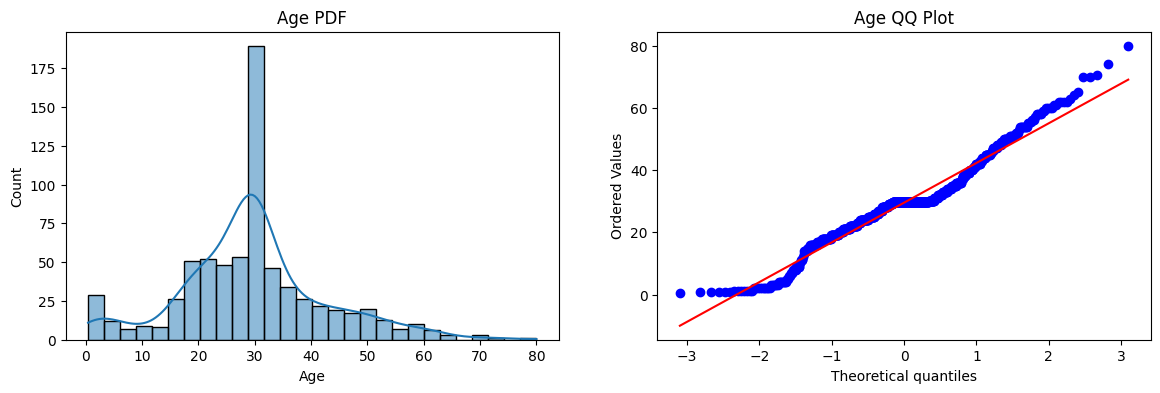

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'],kde = True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

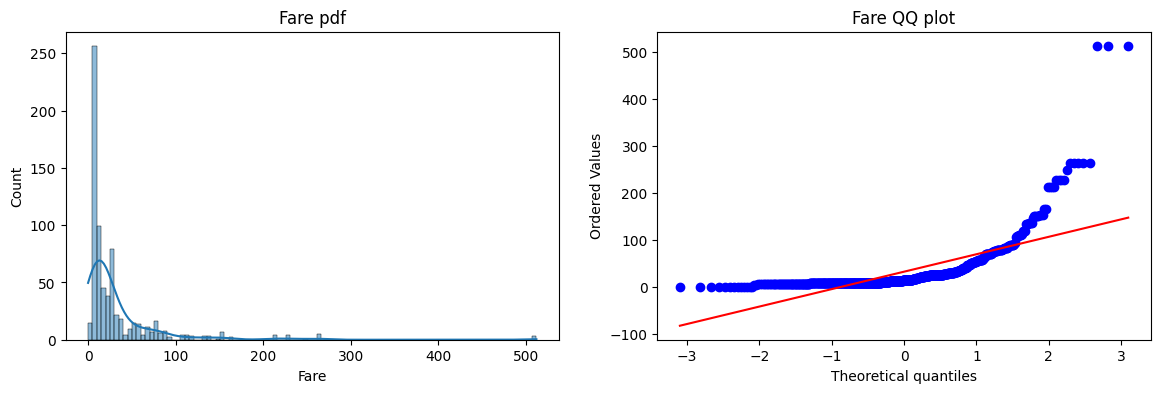

In [15]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'],kde = True)
plt.title('Fare pdf')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist = 'norm',plot = plt)
plt.title('Fare QQ plot')

plt.show()

- From the two graphs you can see age is somewhat normally distributed. But fare is right skewed.
- For right skewed data we use log transformation

Before applying transformation lets see the accuracy score

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [18]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred = clf.predict(X_test)
y2_pred = clf2.predict(X_test)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [21]:
print("LR",accuracy_score(y_test,y_pred))
print("DT",accuracy_score(y_test,y2_pred))

LR 0.6480446927374302
DT 0.6703910614525139


## Applying transformation

In [22]:
from sklearn.preprocessing import FunctionTransformer

In [23]:
#what log1p does is increases all values by one so that if there are zeros they become 1. since log(0) is undefined
trf = FunctionTransformer(func = np.log1p)

In [24]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [25]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [26]:
y_pred = clf.predict(X_test_transformed)
y2_pred = clf.predict(X_test_transformed)

In [27]:
print("LR", accuracy_score(y_test,y_pred))
print("DT", accuracy_score(y_test,y2_pred))

LR 0.6815642458100558
DT 0.6815642458100558


- The cross_val_score function is designed to evaluate the model using cross-validation, which involves splitting the dataset into several folds and training the model multiple times, each time on a different training set and validating on a different validation set.
- Hence, cross_val_score takes X and y instead of X_train and y_train

In [28]:
print("LR", cross_val_score(clf,df.iloc[:,1:],df.iloc[:,0],scoring='accuracy',cv=10).mean())
print("DT", cross_val_score(clf2,df.iloc[:,1:],df.iloc[:,0],scoring='accuracy',cv=10).mean())

LR 0.6589013732833957
DT 0.6509737827715355


- Hence you can see the the accuracy of Linear reg increased

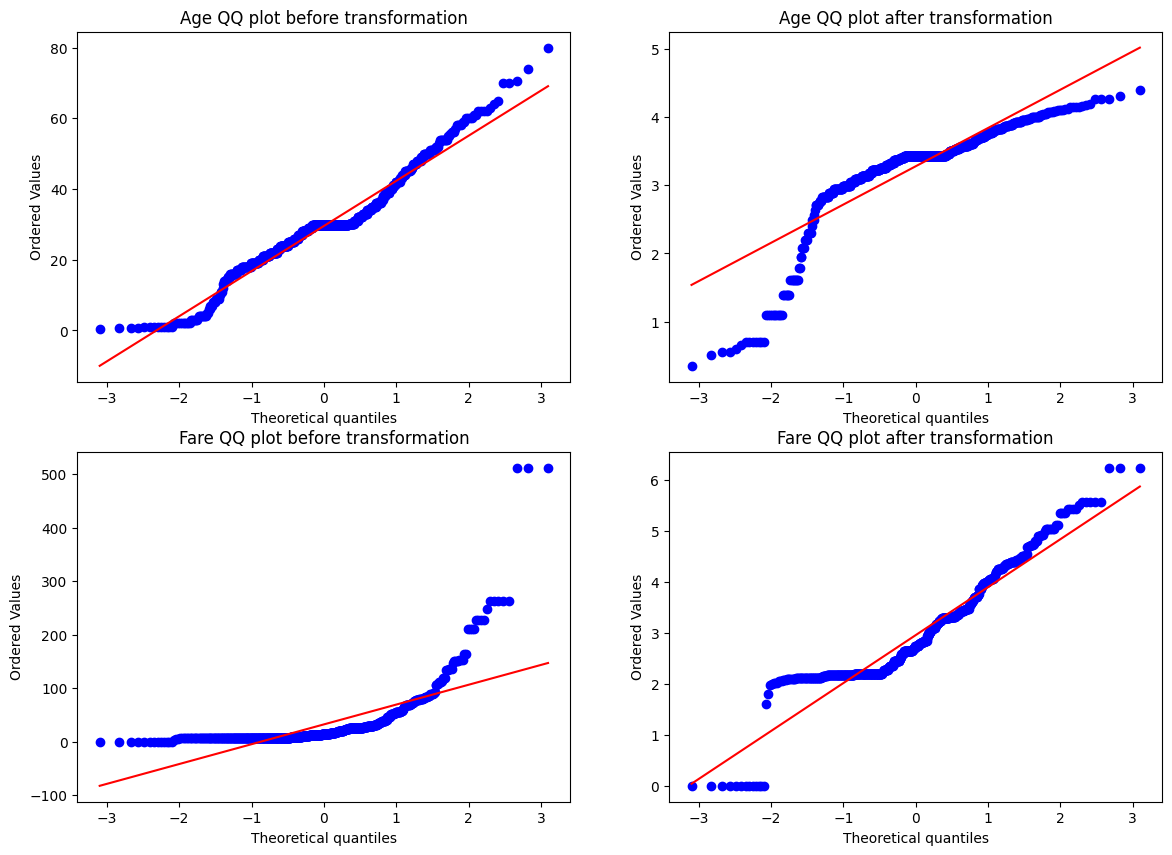

In [29]:
plt.figure(figsize = (14,10))
plt.subplot(221)
stats.probplot(X_train['Age'],dist = 'norm',plot = plt)
plt.title('Age QQ plot before transformation')

plt.subplot(222)
stats.probplot(X_train_transformed['Age'],dist = 'norm',plot = plt)
plt.title('Age QQ plot after transformation')

plt.subplot(223)
stats.probplot(X_train['Fare'],dist = 'norm',plot = plt)
plt.title('Fare QQ plot before transformation')

plt.subplot(224)
stats.probplot(X_train_transformed['Fare'],dist = 'norm',plot = plt)
plt.title('Fare QQ plot after transformation')

plt.show()